<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
#data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,...,Frustration_Complexityoftechstackfordeployment,Frustration_Reliabilityoftools/systemsusedinwork,Frustration_Trackingmywork,Frustration_Patching/updatingcorecomponents,Frustration_Numberofsoftwaretoolsinuse,Frustration_Showingmycontributions,Frustration_Maintainingsecurityofcodebeingproduced,Frustration_Maintainingsecurityofsystems/platformsusedinwork,Frustration_Noneofthese,ExperienceRange
0,0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,...,0,0,0,0,0,0,0,0,0,0-5
1,1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,10-20
2,2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,...,0,0,0,0,0,0,0,0,0,>20
3,3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5
4,4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
df.shape

(65437, 257)

In [4]:
df_1 = df.iloc[:, list(range(0, 20))]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       65437 non-null  int64  
 1   Unnamed: 0         65437 non-null  int64  
 2   ResponseId         65437 non-null  int64  
 3   MainBranch         65437 non-null  object 
 4   Age                65437 non-null  object 
 5   RemoteWork         65437 non-null  object 
 6   EdLevel            65437 non-null  object 
 7   YearsCode          65437 non-null  float64
 8   YearsCodePro       65437 non-null  float64
 9   DevType            65437 non-null  object 
 10  OrgSize            65437 non-null  object 
 11  PurchaseInfluence  65437 non-null  object 
 12  BuildvsBuy         65437 non-null  object 
 13  Country            65437 non-null  object 
 14  CompTotal          65437 non-null  float64
 15  ICorPM             65437 non-null  object 
 16  WorkExp            654

In [5]:
df_1.head()

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuildvsBuy,Country,CompTotal,ICorPM,WorkExp,TimeSearching,TimeAnswering,Industry
0,0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,no answer,no answer,no answer,United States of America,0.0,no answer,0.0,no answer,no answer,no answer
1,1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",no answer,no answer,no answer,United Kingdom,0.0,Individual contributor,17.0,no answer,no answer,no answer
2,2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,no answer,no answer,no answer,United Kingdom,0.0,no answer,0.0,no answer,no answer,no answer
3,3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",no answer,no answer,no answer,Canada,0.0,no answer,0.0,no answer,no answer,no answer
4,4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",no answer,no answer,no answer,Norway,0.0,no answer,0.0,no answer,no answer,no answer


In [6]:
df_2 = df.iloc[:, list(range(21, 40))]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   JobSatPoints_4                                             65437 non-null  float64
 1   JobSatPoints_5                                             65437 non-null  float64
 2   JobSatPoints_6                                             65437 non-null  float64
 3   JobSatPoints_7                                             65437 non-null  float64
 4   JobSatPoints_8                                             65437 non-null  float64
 5   JobSatPoints_9                                             65437 non-null  float64
 6   JobSatPoints_10                                            65437 non-null  float64
 7   JobSatPoints_11                                            65437 non-null  float64
 8   Conver

In [7]:
df_2.head()

,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Employment_Employedfull-time,Employment_Independentcontractorfreelancerorself-employed,Employment_Studentfull-time,Employment_Employedpart-time,Employment_Notemployedbutlookingforwork,Employment_Studentpart-time,Employment_Notemployedandnotlookingforwork,Employment_Retired,Employment_Iprefernottosay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0


In [8]:
df_3 = df.iloc[:, list(range(41, 60))]
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   CodingActivities_Professionaldevelopmentorself-pacedlearningfromonlinecourses  65437 non-null  int64 
 1   CodingActivities_Contributetoopen-sourceprojects                               65437 non-null  int64 
 2   CodingActivities_Freelance/contractwork                                        65437 non-null  int64 
 3   CodingActivities_Bootstrappingabusiness                                        65437 non-null  int64 
 4   CodingActivities_Schooloracademicwork                                          65437 non-null  int64 
 5   CodingActivities_Idon’tcodeoutsideofwork                                       65437 non-null  int64 
 6   CodingActivities_Other(pleases

In [9]:
df_3.head()

,CodingActivities_Professionaldevelopmentorself-pacedlearningfromonlinecourses,CodingActivities_Contributetoopen-sourceprojects,CodingActivities_Freelance/contractwork,CodingActivities_Bootstrappingabusiness,CodingActivities_Schooloracademicwork,CodingActivities_Idon’tcodeoutsideofwork,CodingActivities_Other(pleasespecify),CurrencyCode,CurrencyName,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_Python,LanguageHaveWorkedWith_SQL,LanguageHaveWorkedWith_TypeScript,LanguageHaveWorkedWith_Bash/Shell(allshells),LanguageHaveWorkedWith_Java,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_C
0,0,0,0,0,0,0,0,no answer,no answer,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,no answer,no answer,1,1,1,0,1,0,1,0,1,1
2,0,1,0,0,0,0,0,no answer,no answer,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,no answer,no answer,1,1,1,1,1,0,1,0,1,1
4,0,0,0,0,0,0,0,no answer,no answer,1,1,1,0,0,0,1,0,1,1


In [10]:
df_4 = df.iloc[:, list(range(61, 80))]
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   LanguageHaveWorkedWith_PowerShell         65437 non-null  int64
 1   LanguageHaveWorkedWith_Go                 65437 non-null  int64
 2   LanguageHaveWorkedWith_Rust               65437 non-null  int64
 3   LanguageHaveWorkedWith_Kotlin             65437 non-null  int64
 4   LanguageHaveWorkedWith_Lua                65437 non-null  int64
 5   LanguageHaveWorkedWith_Dart               65437 non-null  int64
 6   LanguageHaveWorkedWith_Assembly           65437 non-null  int64
 7   LanguageHaveWorkedWith_Ruby               65437 non-null  int64
 8   LanguageHaveWorkedWith_Swift              65437 non-null  int64
 9   LanguageHaveWorkedWith_R                  65437 non-null  int64
 10  LanguageHaveWorkedWith_VisualBasic(.Net)  65437 non-null  

In [11]:
df_4.head()

,LanguageHaveWorkedWith_PowerShell,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_Rust,LanguageHaveWorkedWith_Kotlin,LanguageHaveWorkedWith_Lua,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Ruby,LanguageHaveWorkedWith_Swift,LanguageHaveWorkedWith_R,LanguageHaveWorkedWith_VisualBasic(.Net),LanguageHaveWorkedWith_MATLAB,LanguageHaveWorkedWith_VBA,LanguageHaveWorkedWith_Groovy,LanguageHaveWorkedWith_Scala,LanguageHaveWorkedWith_Perl,LanguageHaveWorkedWith_GDScript,LanguageHaveWorkedWith_Objective-C,LanguageHaveWorkedWith_Elixir
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [12]:
df_5 = df.iloc[:, list(range(81, 100))]
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   LanguageHaveWorkedWith_Delphi       65437 non-null  int64
 1   LanguageHaveWorkedWith_MicroPython  65437 non-null  int64
 2   LanguageHaveWorkedWith_Lisp         65437 non-null  int64
 3   LanguageHaveWorkedWith_Clojure      65437 non-null  int64
 4   LanguageHaveWorkedWith_Julia        65437 non-null  int64
 5   LanguageHaveWorkedWith_Zig          65437 non-null  int64
 6   LanguageHaveWorkedWith_Fortran      65437 non-null  int64
 7   LanguageHaveWorkedWith_Solidity     65437 non-null  int64
 8   LanguageHaveWorkedWith_Ada          65437 non-null  int64
 9   LanguageHaveWorkedWith_Erlang       65437 non-null  int64
 10  LanguageHaveWorkedWith_F#           65437 non-null  int64
 11  LanguageHaveWorkedWith_Apex         65437 non-null  int64
 12  Lang

In [13]:
df_5.head()

,LanguageHaveWorkedWith_Delphi,LanguageHaveWorkedWith_MicroPython,LanguageHaveWorkedWith_Lisp,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Zig,LanguageHaveWorkedWith_Fortran,LanguageHaveWorkedWith_Solidity,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Erlang,LanguageHaveWorkedWith_F#,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_Prolog,LanguageHaveWorkedWith_OCaml,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,LanguageHaveWorkedWith_Nim,LanguageHaveWorkedWith_Zephyr,LanguageWantToWorkWith_Python
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
df_6 = df.iloc[:, list(range(101, 120))]
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   LanguageWantToWorkWith_SQL                    65437 non-null  int64
 1   LanguageWantToWorkWith_HTML/CSS               65437 non-null  int64
 2   LanguageWantToWorkWith_TypeScript             65437 non-null  int64
 3   LanguageWantToWorkWith_Rust                   65437 non-null  int64
 4   LanguageWantToWorkWith_Go                     65437 non-null  int64
 5   LanguageWantToWorkWith_Bash/Shell(allshells)  65437 non-null  int64
 6   LanguageWantToWorkWith_C#                     65437 non-null  int64
 7   LanguageWantToWorkWith_C++                    65437 non-null  int64
 8   LanguageWantToWorkWith_Java                   65437 non-null  int64
 9   LanguageWantToWorkWith_C                      65437 non-null  int64
 10  LanguageWa

In [15]:
df_6.head()

,LanguageWantToWorkWith_SQL,LanguageWantToWorkWith_HTML/CSS,LanguageWantToWorkWith_TypeScript,LanguageWantToWorkWith_Rust,LanguageWantToWorkWith_Go,LanguageWantToWorkWith_Bash/Shell(allshells),LanguageWantToWorkWith_C#,LanguageWantToWorkWith_C++,LanguageWantToWorkWith_Java,LanguageWantToWorkWith_C,LanguageWantToWorkWith_Kotlin,LanguageWantToWorkWith_PHP,LanguageWantToWorkWith_PowerShell,LanguageWantToWorkWith_Swift,LanguageWantToWorkWith_Dart,LanguageWantToWorkWith_Zig,LanguageWantToWorkWith_Lua,LanguageWantToWorkWith_Assembly,LanguageWantToWorkWith_Elixir
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0


In [16]:
df_7 = df.iloc[:, list(range(121, 140))]
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   LanguageWantToWorkWith_Haskell            65437 non-null  int64
 1   LanguageWantToWorkWith_R                  65437 non-null  int64
 2   LanguageWantToWorkWith_Scala              65437 non-null  int64
 3   LanguageWantToWorkWith_GDScript           65437 non-null  int64
 4   LanguageWantToWorkWith_Clojure            65437 non-null  int64
 5   LanguageWantToWorkWith_F#                 65437 non-null  int64
 6   LanguageWantToWorkWith_Julia              65437 non-null  int64
 7   LanguageWantToWorkWith_Lisp               65437 non-null  int64
 8   LanguageWantToWorkWith_Erlang             65437 non-null  int64
 9   LanguageWantToWorkWith_OCaml              65437 non-null  int64
 10  LanguageWantToWorkWith_MicroPython        65437 non-null  

In [17]:
df_7.head()

,LanguageWantToWorkWith_Haskell,LanguageWantToWorkWith_R,LanguageWantToWorkWith_Scala,LanguageWantToWorkWith_GDScript,LanguageWantToWorkWith_Clojure,LanguageWantToWorkWith_F#,LanguageWantToWorkWith_Julia,LanguageWantToWorkWith_Lisp,LanguageWantToWorkWith_Erlang,LanguageWantToWorkWith_OCaml,LanguageWantToWorkWith_MicroPython,LanguageWantToWorkWith_VisualBasic(.Net),LanguageWantToWorkWith_Solidity,LanguageWantToWorkWith_MATLAB,LanguageWantToWorkWith_Groovy,LanguageWantToWorkWith_Perl,LanguageWantToWorkWith_VBA,LanguageWantToWorkWith_Objective-C,LanguageWantToWorkWith_Delphi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_8 = df.iloc[:, list(range(141, 160))]
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   LanguageWantToWorkWith_Nim                       65437 non-null  int64
 1   LanguageWantToWorkWith_Fortran                   65437 non-null  int64
 2   LanguageWantToWorkWith_Crystal                   65437 non-null  int64
 3   LanguageWantToWorkWith_Cobol                     65437 non-null  int64
 4   LanguageWantToWorkWith_Prolog                    65437 non-null  int64
 5   LanguageWantToWorkWith_Apex                      65437 non-null  int64
 6   LanguageWantToWorkWith_Zephyr                    65437 non-null  int64
 7   DatabaseHaveWorkedWith_PostgreSQL                65437 non-null  int64
 8   DatabaseHaveWorkedWith_MySQL                     65437 non-null  int64
 9   DatabaseHaveWorkedWith_SQLite                    6

In [19]:
df_8.head()

,LanguageWantToWorkWith_Nim,LanguageWantToWorkWith_Fortran,LanguageWantToWorkWith_Crystal,LanguageWantToWorkWith_Cobol,LanguageWantToWorkWith_Prolog,LanguageWantToWorkWith_Apex,LanguageWantToWorkWith_Zephyr,DatabaseHaveWorkedWith_PostgreSQL,DatabaseHaveWorkedWith_MySQL,DatabaseHaveWorkedWith_SQLite,DatabaseHaveWorkedWith_MicrosoftSQLServer,DatabaseHaveWorkedWith_MongoDB,DatabaseHaveWorkedWith_Redis,DatabaseHaveWorkedWith_MariaDB,DatabaseHaveWorkedWith_Elasticsearch,DatabaseHaveWorkedWith_Oracle,DatabaseHaveWorkedWith_Dynamodb,DatabaseHaveWorkedWith_FirebaseRealtimeDatabase,DatabaseHaveWorkedWith_CloudFirestore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [20]:
df_9 = df.iloc[:, list(range(161, 180))]
df_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   DatabaseHaveWorkedWith_MicrosoftAccess  65437 non-null  int64
 1   DatabaseHaveWorkedWith_Supabase         65437 non-null  int64
 2   DatabaseHaveWorkedWith_H2               65437 non-null  int64
 3   DatabaseHaveWorkedWith_CosmosDB         65437 non-null  int64
 4   DatabaseHaveWorkedWith_Snowflake        65437 non-null  int64
 5   DatabaseHaveWorkedWith_InfluxDB         65437 non-null  int64
 6   DatabaseHaveWorkedWith_Cassandra        65437 non-null  int64
 7   DatabaseHaveWorkedWith_DatabricksSQL    65437 non-null  int64
 8   DatabaseHaveWorkedWith_Neo4J            65437 non-null  int64
 9   DatabaseHaveWorkedWith_IBMDB2           65437 non-null  int64
 10  DatabaseHaveWorkedWith_Clickhouse       65437 non-null  int64
 11  DatabaseHaveWor

In [21]:
df_9.head()

,DatabaseHaveWorkedWith_MicrosoftAccess,DatabaseHaveWorkedWith_Supabase,DatabaseHaveWorkedWith_H2,DatabaseHaveWorkedWith_CosmosDB,DatabaseHaveWorkedWith_Snowflake,DatabaseHaveWorkedWith_InfluxDB,DatabaseHaveWorkedWith_Cassandra,DatabaseHaveWorkedWith_DatabricksSQL,DatabaseHaveWorkedWith_Neo4J,DatabaseHaveWorkedWith_IBMDB2,DatabaseHaveWorkedWith_Clickhouse,DatabaseHaveWorkedWith_Solr,DatabaseHaveWorkedWith_DuckDB,DatabaseHaveWorkedWith_Firebird,DatabaseHaveWorkedWith_CouchDB,DatabaseHaveWorkedWith_Cockroachdb,DatabaseHaveWorkedWith_Couchbase,DatabaseHaveWorkedWith_Presto,DatabaseHaveWorkedWith_Datomic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_10 = df.iloc[:, list(range(181, 200))]
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   DatabaseHaveWorkedWith_RavenDB                   65437 non-null  int64
 1   DatabaseHaveWorkedWith_TiDB                      65437 non-null  int64
 2   DatabaseWantToWorkWith_PostgreSQL                65437 non-null  int64
 3   DatabaseWantToWorkWith_SQLite                    65437 non-null  int64
 4   DatabaseWantToWorkWith_MySQL                     65437 non-null  int64
 5   DatabaseWantToWorkWith_MongoDB                   65437 non-null  int64
 6   DatabaseWantToWorkWith_Redis                     65437 non-null  int64
 7   DatabaseWantToWorkWith_MicrosoftSQLServer        65437 non-null  int64
 8   DatabaseWantToWorkWith_Elasticsearch             65437 non-null  int64
 9   DatabaseWantToWorkWith_MariaDB                   6

In [23]:
df_10.head()

,DatabaseHaveWorkedWith_RavenDB,DatabaseHaveWorkedWith_TiDB,DatabaseWantToWorkWith_PostgreSQL,DatabaseWantToWorkWith_SQLite,DatabaseWantToWorkWith_MySQL,DatabaseWantToWorkWith_MongoDB,DatabaseWantToWorkWith_Redis,DatabaseWantToWorkWith_MicrosoftSQLServer,DatabaseWantToWorkWith_Elasticsearch,DatabaseWantToWorkWith_MariaDB,DatabaseWantToWorkWith_Dynamodb,DatabaseWantToWorkWith_Supabase,DatabaseWantToWorkWith_Oracle,DatabaseWantToWorkWith_BigQuery,DatabaseWantToWorkWith_FirebaseRealtimeDatabase,DatabaseWantToWorkWith_Cassandra,DatabaseWantToWorkWith_CloudFirestore,DatabaseWantToWorkWith_Snowflake,DatabaseWantToWorkWith_CosmosDB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_11 = df.iloc[:, list(range(201, 220))]
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   DatabaseWantToWorkWith_DuckDB                  65437 non-null  int64
 1   DatabaseWantToWorkWith_Clickhouse              65437 non-null  int64
 2   DatabaseWantToWorkWith_DatabricksSQL           65437 non-null  int64
 3   DatabaseWantToWorkWith_Cockroachdb             65437 non-null  int64
 4   DatabaseWantToWorkWith_InfluxDB                65437 non-null  int64
 5   DatabaseWantToWorkWith_H2                      65437 non-null  int64
 6   DatabaseWantToWorkWith_MicrosoftAccess         65437 non-null  int64
 7   DatabaseWantToWorkWith_CouchDB                 65437 non-null  int64
 8   DatabaseWantToWorkWith_Solr                    65437 non-null  int64
 9   DatabaseWantToWorkWith_Firebird                65437 non-null  int64
 10

In [25]:
df_11.head()

,DatabaseWantToWorkWith_DuckDB,DatabaseWantToWorkWith_Clickhouse,DatabaseWantToWorkWith_DatabricksSQL,DatabaseWantToWorkWith_Cockroachdb,DatabaseWantToWorkWith_InfluxDB,DatabaseWantToWorkWith_H2,DatabaseWantToWorkWith_MicrosoftAccess,DatabaseWantToWorkWith_CouchDB,DatabaseWantToWorkWith_Solr,DatabaseWantToWorkWith_Firebird,DatabaseWantToWorkWith_IBMDB2,DatabaseWantToWorkWith_Datomic,DatabaseWantToWorkWith_Couchbase,DatabaseWantToWorkWith_EventStoreDB,DatabaseWantToWorkWith_Presto,DatabaseWantToWorkWith_TiDB,DatabaseWantToWorkWith_RavenDB,PlatformHaveWorkedWith_AmazonWebServices(AWS),PlatformHaveWorkedWith_MicrosoftAzure
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_12 = df.iloc[:, list(range(221, 240))]
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   PlatformHaveWorkedWith_Cloudflare                      65437 non-null  int64
 1   PlatformHaveWorkedWith_Firebase                        65437 non-null  int64
 2   PlatformHaveWorkedWith_Vercel                          65437 non-null  int64
 3   PlatformHaveWorkedWith_DigitalOcean                    65437 non-null  int64
 4   PlatformHaveWorkedWith_Heroku                          65437 non-null  int64
 5   PlatformHaveWorkedWith_Netlify                         65437 non-null  int64
 6   PlatformHaveWorkedWith_VMware                          65437 non-null  int64
 7   PlatformHaveWorkedWith_Hetzner                         65437 non-null  int64
 8   PlatformHaveWorkedWith_Supabase                        65437 non-n

In [27]:
df_12.head()

,PlatformHaveWorkedWith_Cloudflare,PlatformHaveWorkedWith_Firebase,PlatformHaveWorkedWith_Vercel,PlatformHaveWorkedWith_DigitalOcean,PlatformHaveWorkedWith_Heroku,PlatformHaveWorkedWith_Netlify,PlatformHaveWorkedWith_VMware,PlatformHaveWorkedWith_Hetzner,PlatformHaveWorkedWith_Supabase,PlatformHaveWorkedWith_LinodenowAkamai,PlatformHaveWorkedWith_OVH,PlatformHaveWorkedWith_ManagedHosting,PlatformHaveWorkedWith_OracleCloudInfrastructure(OCI),PlatformHaveWorkedWith_Render,PlatformHaveWorkedWith_Fly.io,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_Databricks,PlatformHaveWorkedWith_PythonAnywhere,PlatformHaveWorkedWith_Vultr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df_13 = df.iloc[:, list(range(241, 257))]
df_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   PlatformHaveWorkedWith_AlibabaCloud                           65437 non-null  int64 
 1   PlatformHaveWorkedWith_IBMCloudOrWatson                       65437 non-null  int64 
 2   PlatformHaveWorkedWith_Scaleway                               65437 non-null  int64 
 3   PlatformHaveWorkedWith_Colocation                             65437 non-null  int64 
 4   Frustration_Amountoftechnicaldebt                             65437 non-null  int64 
 5   Frustration_Complexityoftechstackforbuild                     65437 non-null  int64 
 6   Frustration_Complexityoftechstackfordeployment                65437 non-null  int64 
 7   Frustration_Reliabilityoftools/systemsusedinwork              65437 non-null

In [31]:
df_13.head()

,PlatformHaveWorkedWith_AlibabaCloud,PlatformHaveWorkedWith_IBMCloudOrWatson,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_Colocation,Frustration_Amountoftechnicaldebt,Frustration_Complexityoftechstackforbuild,Frustration_Complexityoftechstackfordeployment,Frustration_Reliabilityoftools/systemsusedinwork,Frustration_Trackingmywork,Frustration_Patching/updatingcorecomponents,Frustration_Numberofsoftwaretoolsinuse,Frustration_Showingmycontributions,Frustration_Maintainingsecurityofcodebeingproduced,Frustration_Maintainingsecurityofsystems/platformsusedinwork,Frustration_Noneofthese,ExperienceRange
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10-20
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,>20
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-5


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [32]:
print('Employed full-time:')
print(df['Employment_Employedfull-time'].sum())        
print('Independent contractor, freelanceror, self-employed:')
print(df['Employment_Independentcontractorfreelancerorself-employed'].sum())  
print('Student full-time:')
print(df['Employment_Studentfull-time'].sum())  
print('Employed part-time:')
print(df['Employment_Employedpart-time'].sum())  
print('Not employed but looking for work:')
print(df['Employment_Notemployedbutlookingforwork'].sum())  
print('Student part-time:')
print(df['Employment_Studentpart-time'].sum())  
print('Not employed and not looking for work:')
print(df['Employment_Notemployedandnotlookingforwork'].sum())  
print('Retired:')
print(df['Employment_Retired'].sum())  
print('I prefer not to say:')
print(df['Employment_Iprefernottosay'].sum())

Employed full-time:
45162
Independent contractor, freelanceror, self-employed:
10726
Student full-time:
8626
Employed part-time:
4145
Not employed but looking for work:
3954
Student part-time:
2656
Not employed and not looking for work:
1203
Retired:
681
I prefer not to say:
546


In [33]:
df.YearsCodePro.value_counts()

YearsCodePro
0.0     13827
2.0      4168
3.0      4093
5.0      3526
10.0     3251
4.0      3215
0.5      2856
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0      492
23.0      448
26.0      426
27.0      380
21.0      380
28.0      342
35.0      285
29.0      196
40.0      194
32.0      194
34.0      169
38.0      134
33.0      132
36.0      119
31.0      106
37.0      104
45.0       56
42.0       55
39.0       54
41.0       51
51.0       50
44.0       42
43.0       37
46.0       21
50.0       14
48.0       14
49.0       11
47.0       10
Name: count, dtype: int64

In [34]:
df.JobSat.value_counts()

JobSat
0.0     36622
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
1.0       276
Name: count, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Check for unique values in the JobSat column to determine the type of plot
print("Unique values in JobSat:", df['JobSat'].unique())

Unique values in JobSat: [ 0.  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.]


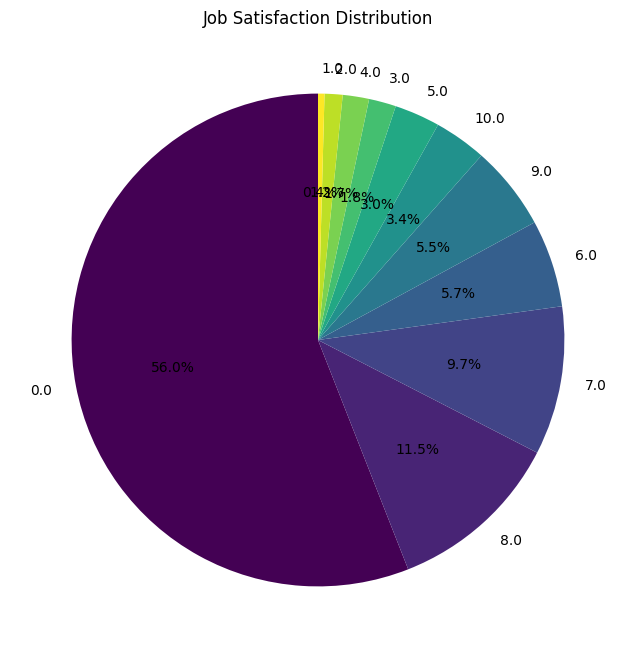

Interpretation:
The pie chart shows the proportion of survey respondents in each job satisfaction category.
Key trends can be inferred by identifying the largest and smallest slices, indicating the most and least common satisfaction levels.


In [37]:
# Option 1: Pie chart for categorical data
job_sat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

# Interpretation for Pie Chart
print("Interpretation:")
print("The pie chart shows the proportion of survey respondents in each job satisfaction category.")
print("Key trends can be inferred by identifying the largest and smallest slices, indicating the most and least common satisfaction levels.")


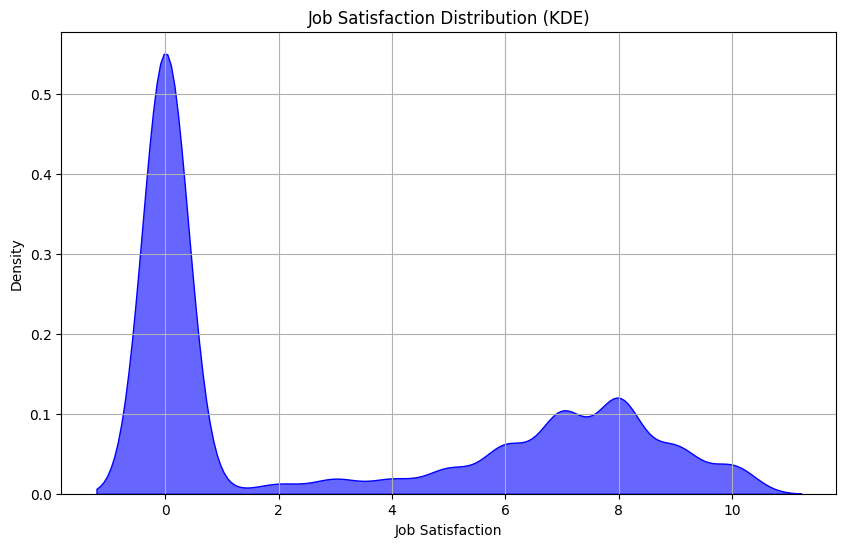

Interpretation:
The KDE plot visualizes the density of job satisfaction ratings.
Peaks in the plot represent the most common satisfaction levels, while troughs indicate less common levels.


In [38]:
# Option 2: KDE plot for continuous data
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, color='blue', alpha=0.6)
plt.title('Job Satisfaction Distribution (KDE)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Interpretation for KDE Plot
print("Interpretation:")
print("The KDE plot visualizes the density of job satisfaction ratings.")
print("Peaks in the plot represent the most common satisfaction levels, while troughs indicate less common levels.")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1500x800 with 0 Axes>

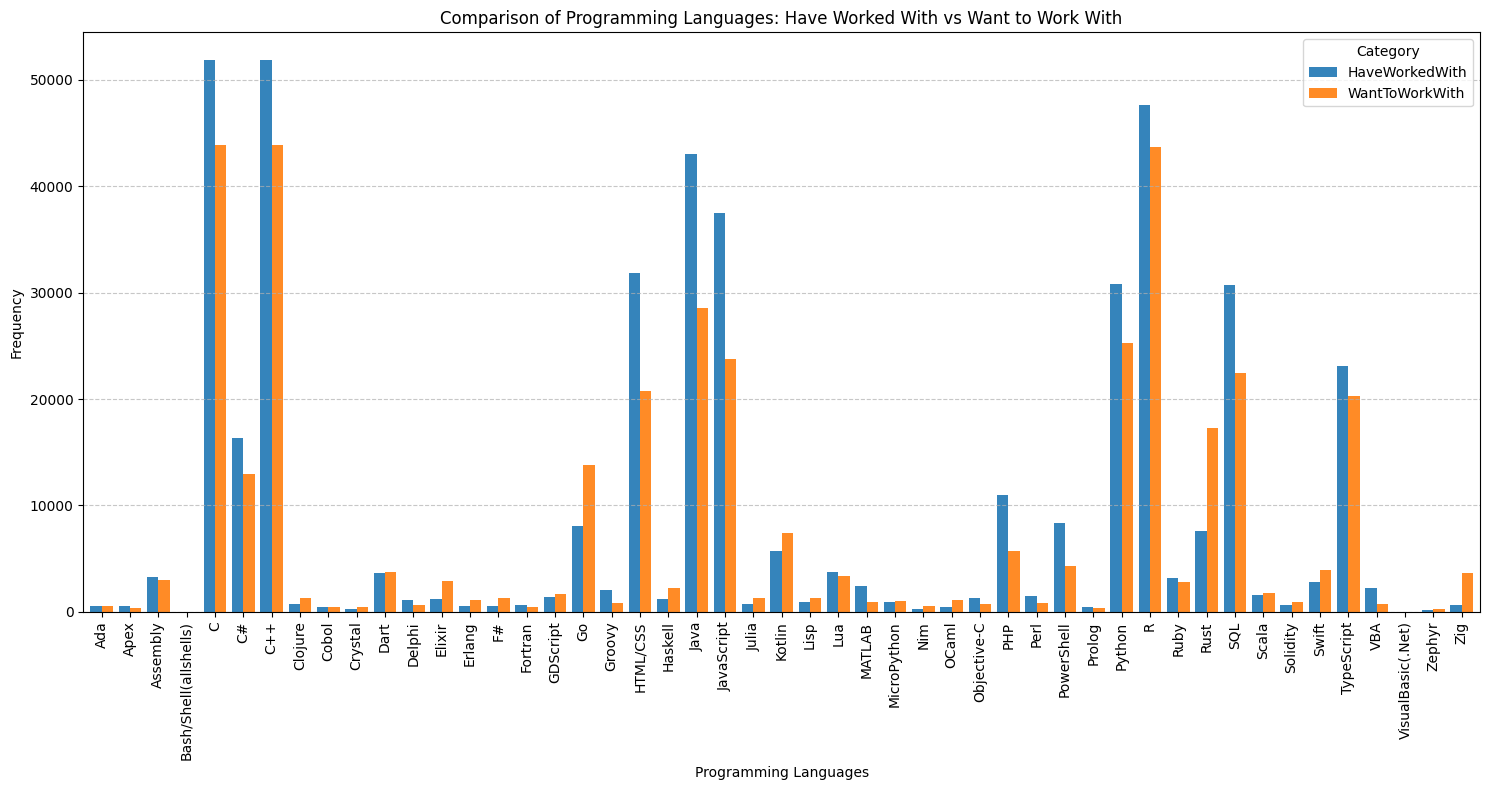

Interpretation:
This chart compares each programming language's frequency between respondents who have worked with it and those who want to work with it.
Languages with similar heights for both categories indicate consistent demand, while significant gaps highlight shifting trends.


In [39]:
# Extract and sum up the binary columns for HaveWorkedWith and WantToWorkWith
have_worked_with = df.filter(like="LanguageHaveWorkedWith").sum()
want_to_work_with = df.filter(like="LanguageWantToWorkWith").sum()


# Prepare a DataFrame for comparison
comparison_df_have_worked = pd.DataFrame({
    'Language': have_worked_with.index.str.replace('LanguageHaveWorkedWith_', ''),
    'HaveWorkedWith': have_worked_with.values,
}).sort_values(by='HaveWorkedWith', ascending=False)
comparison_df_want_to_work = pd.DataFrame({
    'Language': want_to_work_with.index.str.replace('LanguageWantToWorkWith_', ''),
    'WantToWorkWith': want_to_work_with.values
}).sort_values(by='WantToWorkWith', ascending=False)
comparison_df = pd.merge(
    comparison_df_have_worked,
    comparison_df_want_to_work,
    on='Language',
    how='outer'  # 'outer' ensures all languages from both DataFrames are included
)

# Plotting a grouped bar chart
plt.figure(figsize=(15, 8))
comparison_df.set_index('Language').plot(kind='bar', figsize=(15, 8), width=0.8, alpha=0.9)
plt.title('Comparison of Programming Languages: Have Worked With vs Want to Work With')
plt.ylabel('Frequency')
plt.xlabel('Programming Languages')
plt.xticks(rotation=90)
plt.legend(title="Category")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretation
print("Interpretation:")
print("This chart compares each programming language's frequency between respondents who have worked with it and those who want to work with it.")
print("Languages with similar heights for both categories indicate consistent demand, while significant gaps highlight shifting trends.")


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1500x800 with 0 Axes>

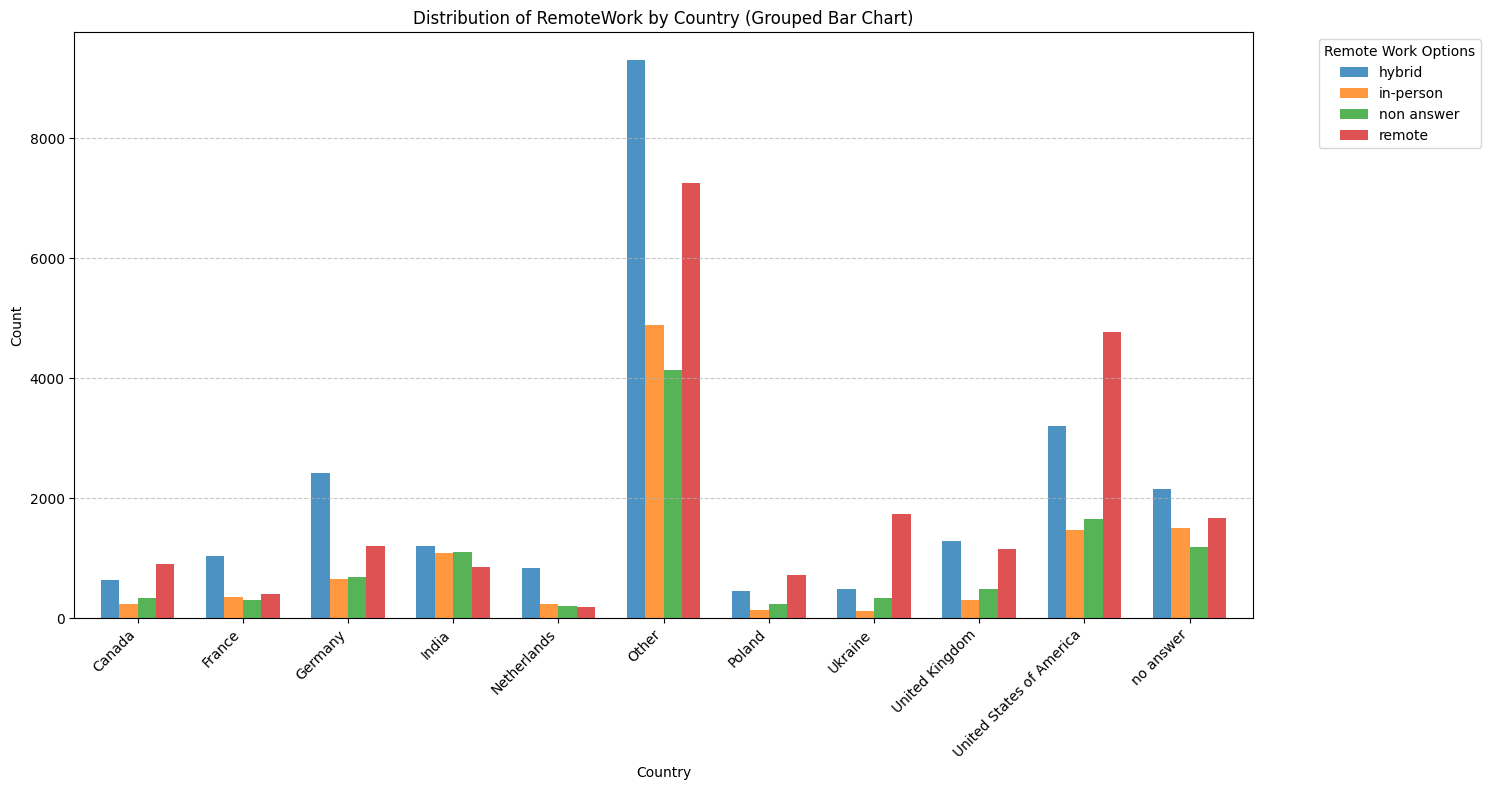

In [40]:
# Aggregate regions to focus on the top 10
top_regions = df['Country'].value_counts().nlargest(10).index
df['Country_Aggregated'] = df['Country'].apply(lambda x: x if x in top_regions else 'Other')

# Group data by aggregated regions and RemoteWork
remote_work_distribution = df.groupby(['Country_Aggregated', 'RemoteWork']).size().unstack(fill_value=0)

# Visualize as a grouped bar chart
plt.figure(figsize=(15, 8))
remote_work_distribution.plot(kind='bar', stacked=False, figsize=(15, 8), alpha=0.8, width=0.7)
plt.title('Distribution of RemoteWork by Country (Grouped Bar Chart)')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

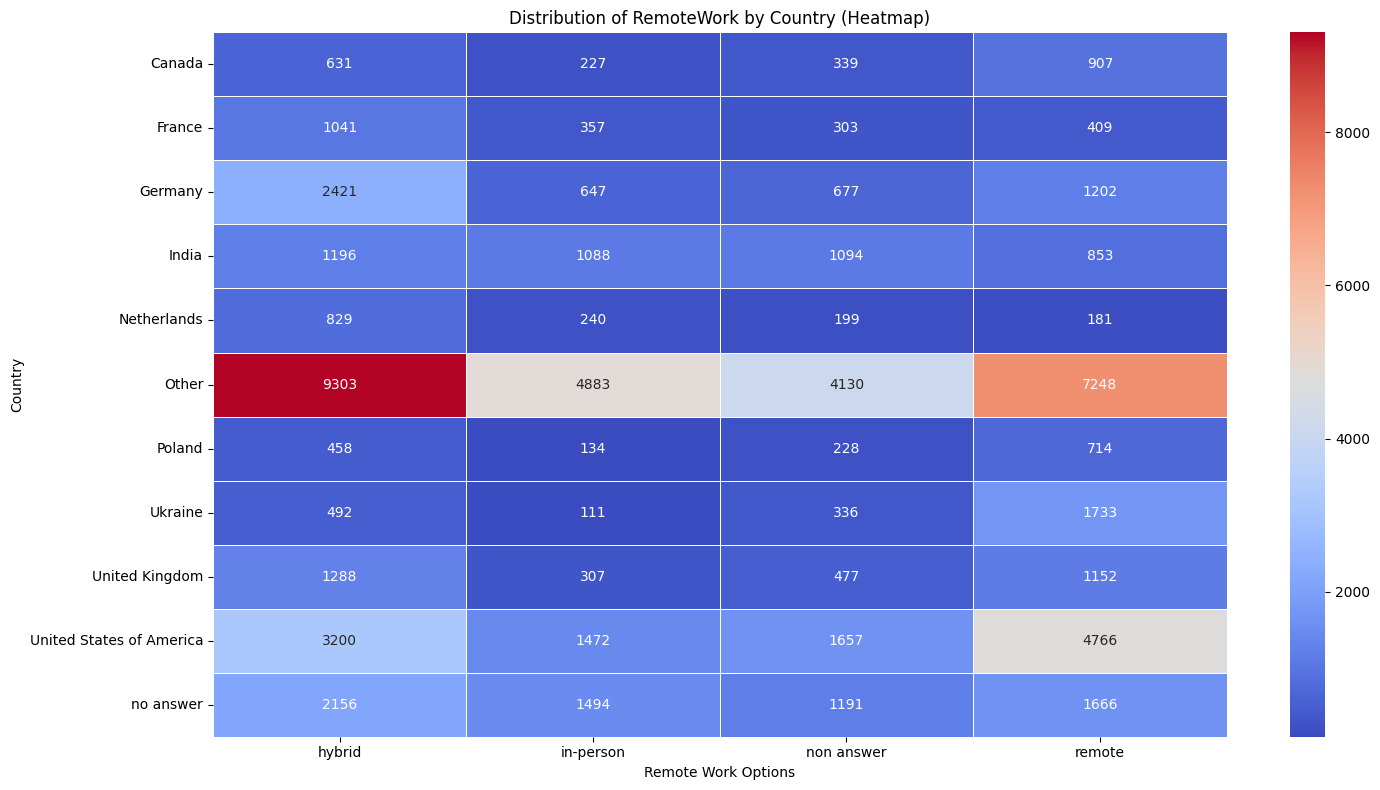

In [41]:
# Visualize as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(remote_work_distribution, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Distribution of RemoteWork by Country (Heatmap)')
plt.ylabel('Country')
plt.xlabel('Remote Work Options')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [42]:
from scipy.stats import pearsonr, spearmanr

In [43]:
# Calculate Pearson and Spearman correlation coefficients
pearson_corr, _ = pearsonr(df['JobSat'], df['YearsCodePro'])
spearman_corr, _ = spearmanr(df['JobSat'], df['YearsCodePro'])

# Print correlation results
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")
print(f"Spearman correlation coefficient: {spearman_corr:.2f}")

Pearson correlation coefficient: 0.21
Spearman correlation coefficient: 0.33


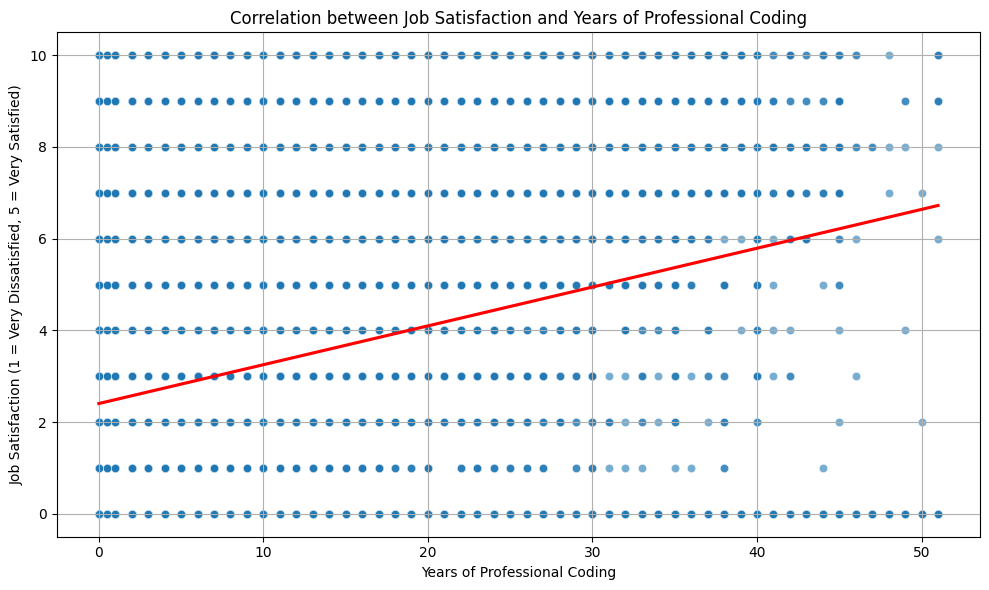

In [44]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat', alpha=0.6)
sns.regplot(data=df, x='YearsCodePro', y='JobSat', scatter=False, color='red', ci=None)
plt.title('Correlation between Job Satisfaction and Years of Professional Coding')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction (1 = Very Dissatisfied, 5 = Very Satisfied)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [45]:
columns = df.columns
columns_Employment = [col for col in columns if col.startswith('Employment_')]
print(columns_Employment)

['Employment_Employedfull-time', 'Employment_Independentcontractorfreelancerorself-employed', 'Employment_Studentfull-time', 'Employment_Employedpart-time', 'Employment_Notemployedbutlookingforwork', 'Employment_Studentpart-time', 'Employment_Notemployedandnotlookingforwork', 'Employment_Retired', 'Employment_Iprefernottosay']


In [46]:
# Create a pivot table
edlevel_crosstab = df.pivot_table(
    index='EdLevel',
    values=columns_Employment,
    aggfunc='sum'
)

# Swap rows and columns
edlevel_crosstab =edlevel_crosstab.transpose()

# Print the pivot table
print(edlevel_crosstab)

EdLevel                                             Associate degree  \
Employment_Employedfull-time                                    1260   
Employment_Employedpart-time                                     137   
Employment_Independentcontractorfreelancerorsel...               323   
Employment_Iprefernottosay                                         9   
Employment_Notemployedandnotlookingforwork                        22   
Employment_Notemployedbutlookingforwork                          127   
Employment_Retired                                                23   
Employment_Studentfull-time                                      189   
Employment_Studentpart-time                                       98   

EdLevel                                             Bachelor’s degree  \
Employment_Employedfull-time                                    19136   
Employment_Employedpart-time                                     1344   
Employment_Independentcontractorfreelancerorsel...          

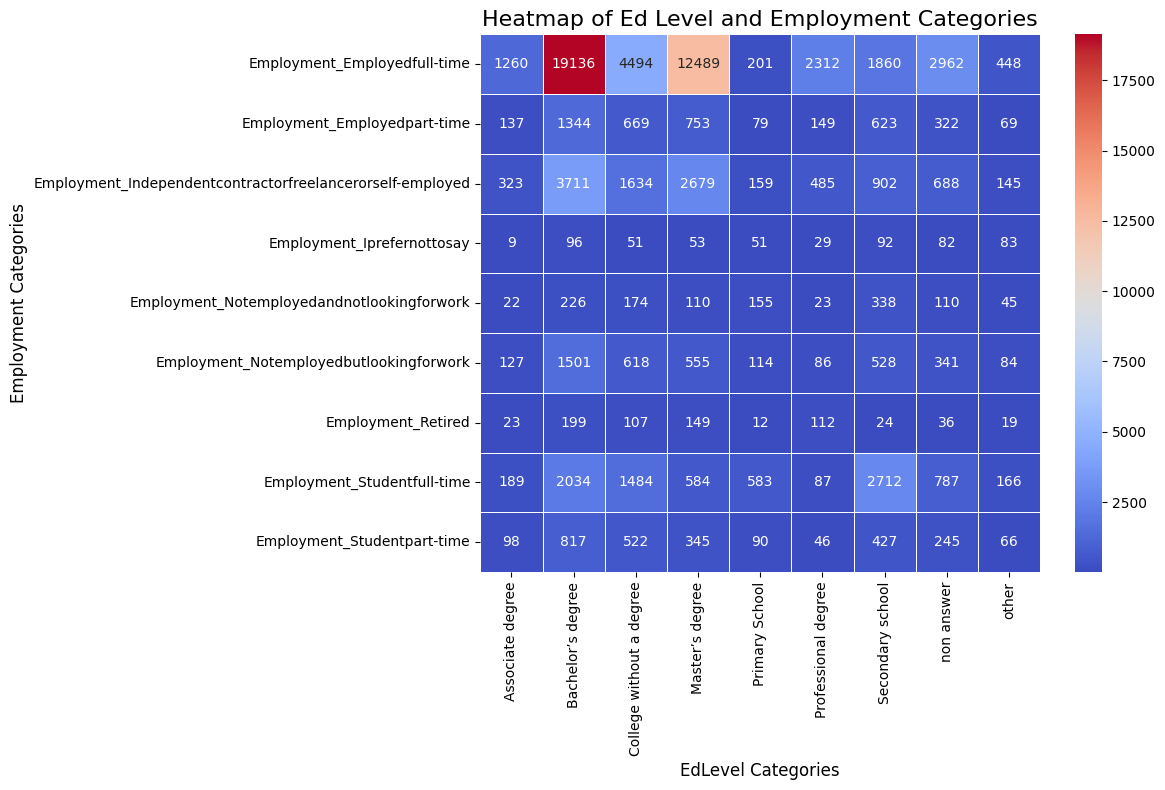

In [47]:
# Create a heatmap from the transposed pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(
    edlevel_crosstab, 
    annot=True, 
    fmt="g", 
    cmap="coolwarm", 
    linewidths=0.5
)

# Set the title and labels
plt.title("Heatmap of Ed Level and Employment Categories", fontsize=16)
plt.xlabel("EdLevel Categories", fontsize=12)
plt.ylabel("Employment Categories", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
